In [39]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from env import get_db_url
import acquire

In [3]:
sql_all = acquire.sql_all

In [4]:
zillow = acquire.get_data_from_sql(sql_all)

In [5]:
zillow.columns.tolist()

['parcelid',
 'id',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


(55.0, 0.0)

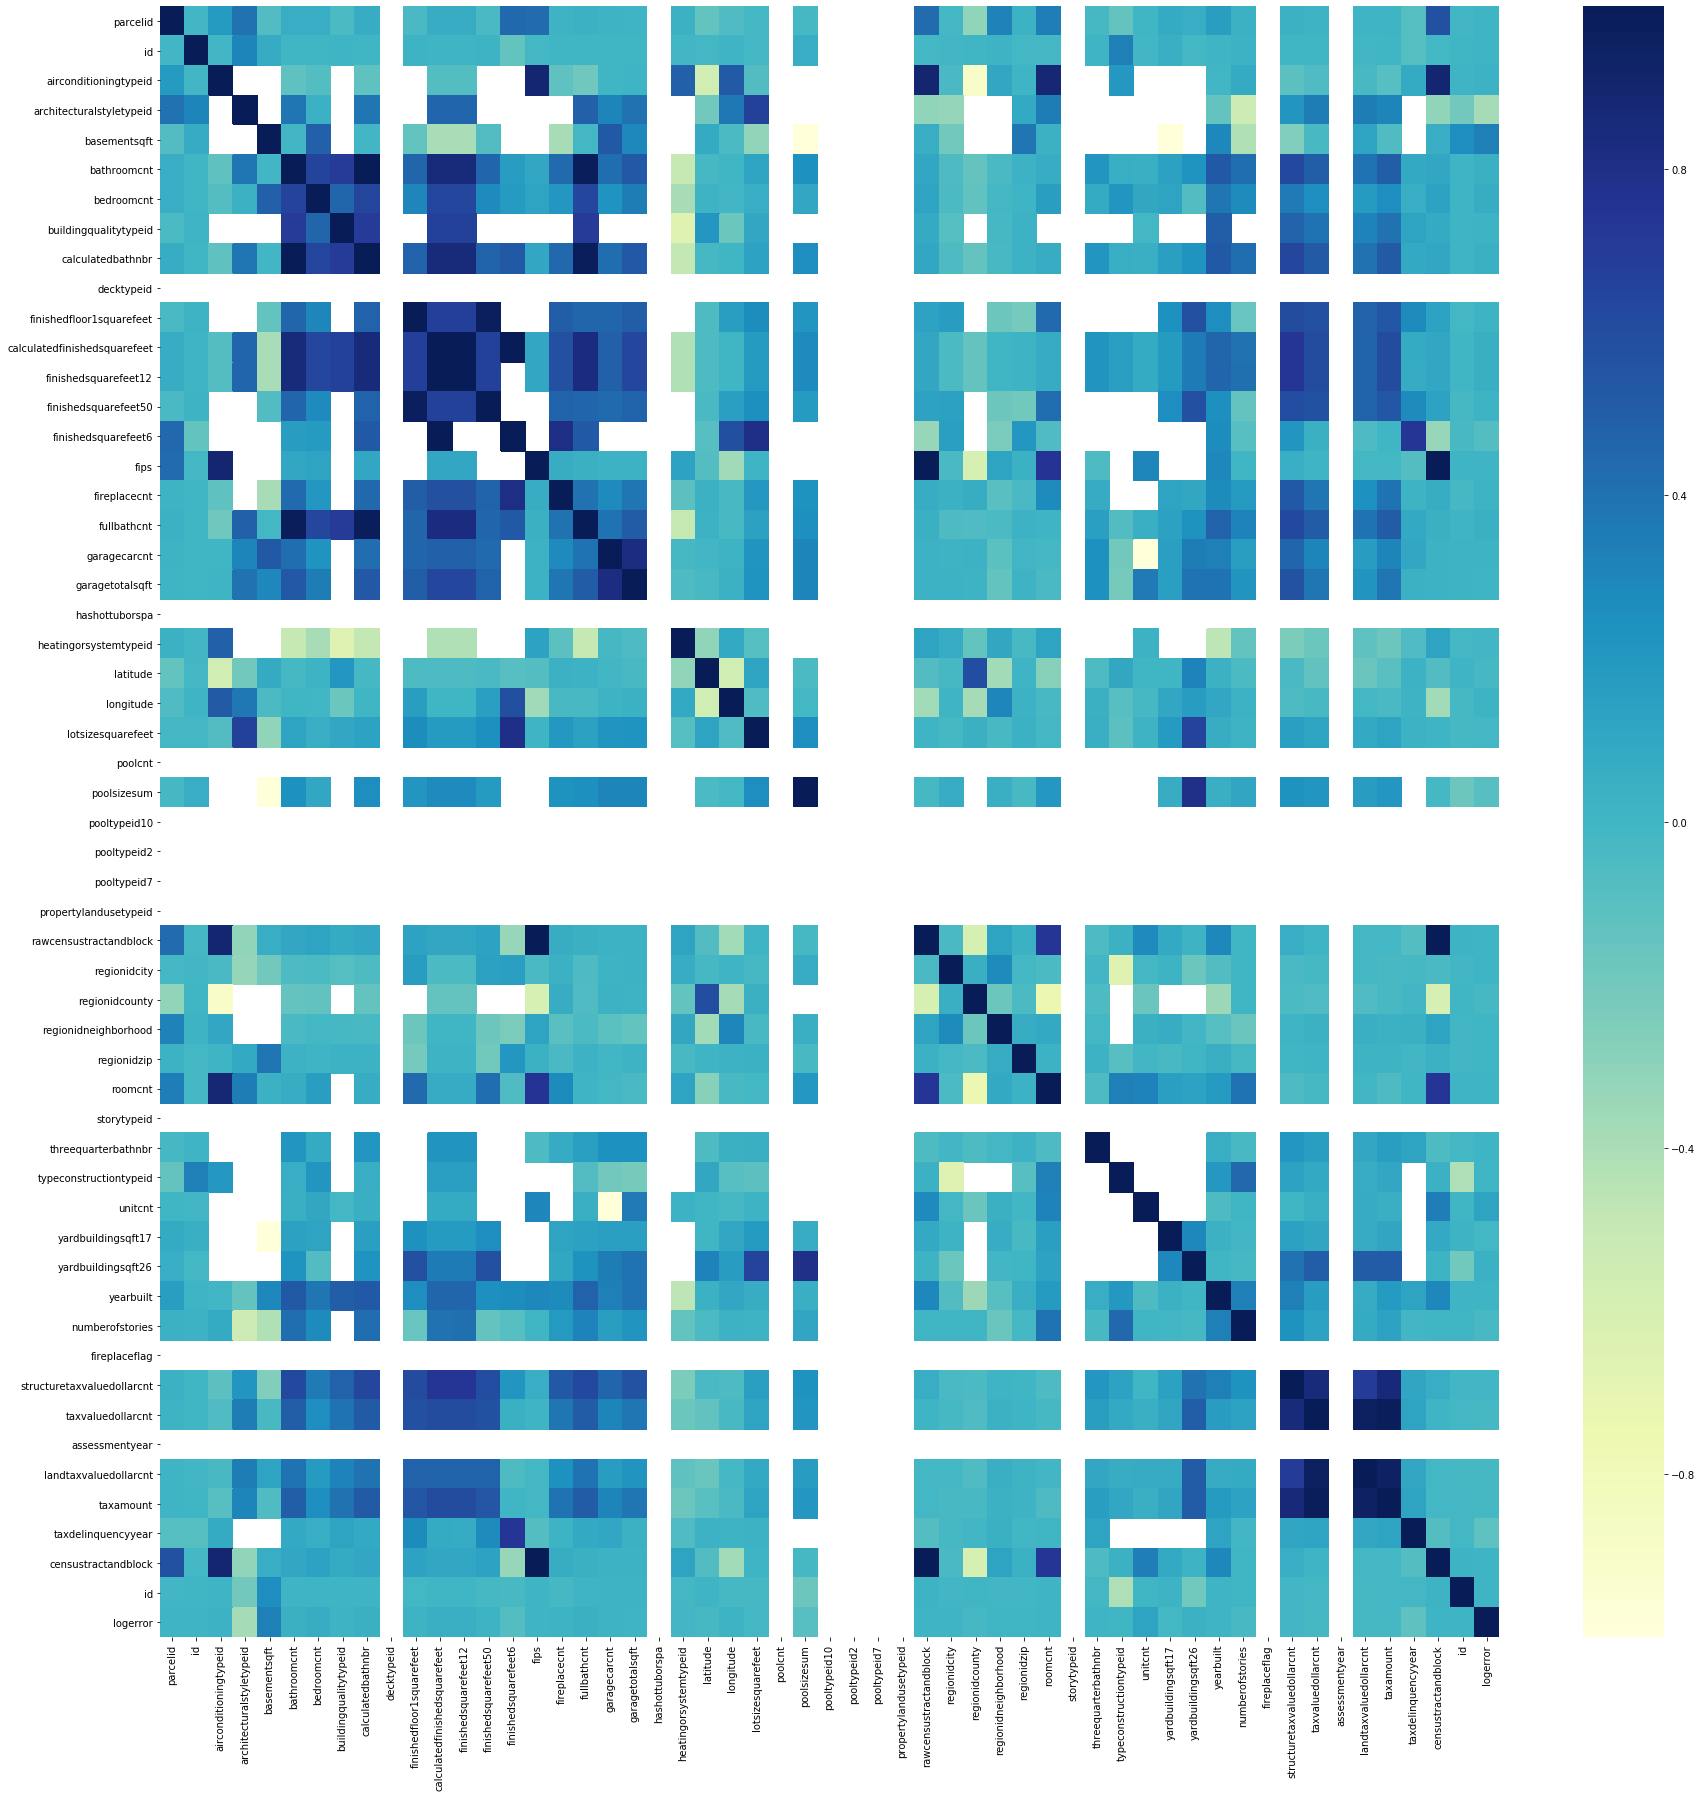

In [40]:
plt.figure(figsize=(30,30))
corr = zillow.corr()
ax = sns.heatmap(corr, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:
zillow.regionidneighborhood.isna().sum()

9533

ValueError: cannot convert float NaN to integer

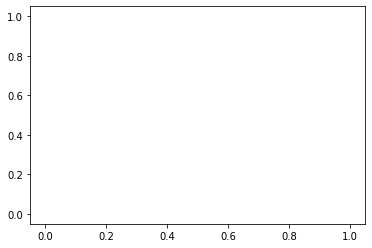

In [7]:
sns.distplot(zillow.regionidneighborhood)

In [41]:
# divide avg sq feet of a neighborhood by (number of houses / avg sq feet) 
divisor = pd.DataFrame(zillow.regionidneighborhood.value_counts() / zillow.groupby('regionidneighborhood').calculatedfinishedsquarefeet.agg('median').round(2))
divisor = (zillow.groupby('regionidneighborhood').calculatedfinishedsquarefeet.agg('median') / divisor[0]).round(4) 

divisor

regionidneighborhood
6952.000       38805.813
7877.000       38706.372
11950.000     291312.000
13017.000      39828.938
13176.000      80560.286
                 ...    
764141.000   3048516.000
764142.000   1244898.062
764146.000   7246864.000
764147.000   1433825.333
764148.000   2227408.333
Length: 369, dtype: float64

In [28]:
zillow[zillow.regionidneighborhood == 274343.0].taxvaluedollarcnt.agg('median')

28898.0

In [24]:
zillow.groupby('regionidneighborhood').taxvaluedollarcnt.agg('median').sort_values().round(2).head(20)

regionidneighborhood
274343.0     28898.0
268404.0     38680.0
416304.0     61247.0
268269.0     68230.0
761055.0     71360.0
273041.0     72599.0
268055.0     73508.0
416329.0     75888.0
268050.0     83694.0
762961.0     87148.0
273663.0     88745.0
274513.0     88802.0
268118.0     89500.0
762931.0     90206.0
224568.0     96232.5
762185.0    100609.0
38888.0     102430.5
268546.0    102508.0
762188.0    103712.0
416336.0    105786.0
Name: taxvaluedollarcnt, dtype: float64

In [22]:
zillow.groupby('regionidneighborhood').calculatedfinishedsquarefeet.agg('median').sort_values().round(2).head(20)

regionidneighborhood
274343.0    444.0
268118.0    730.0
268007.0    804.0
403190.0    813.0
268596.0    816.0
275067.0    853.5
268057.0    878.0
268334.0    878.0
273567.0    887.0
416315.0    894.0
224568.0    895.0
117023.0    928.0
761211.0    930.0
416309.0    946.5
762945.0    960.0
763220.0    972.0
268403.0    979.5
274587.0    982.0
268010.0    989.0
273252.0    990.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [21]:
# Divide number of houses in each neighborhood by avg sq footage of that neighborhood
(zillow.regionidneighborhood.value_counts() / zillow.groupby('regionidneighborhood').calculatedfinishedsquarefeet.agg('median').round(2)).sort_values()

416303.0    0.000220
764138.0    0.000222
275856.0    0.000242
403192.0    0.000259
275111.0    0.000270
              ...   
48570.0     0.065248
276476.0    0.072457
27080.0     0.073238
268496.0    0.094716
118208.0    0.097424
Length: 369, dtype: float64

In [18]:
(zillow.groupby('regionidneighborhood').calculatedfinishedsquarefeet.agg('median').round(2) / zillow.regionidneighborhood.value_counts()).astype(int)

6952.0        22
7877.0        27
11950.0      204
13017.0       24
13176.0       75
            ... 
764141.0    1746
764142.0     557
764146.0    2692
764147.0     691
764148.0     861
Length: 369, dtype: int64

In [35]:
pd.crosstab(zillow.regionidneighborhood, [zillow.taxvaluedollarcnt, zillow.calculatedfinishedsquarefeet], aggfunc='median')

ValueError: aggfunc cannot be used without values.

In [30]:
neighborhood = zillow.groupby('regionidneighborhood').taxvaluedollarcnt.agg('median').sort_values().round(2)
neighborhood = pd.DataFrame(neighborhood)
neighborhood['avg_sf'] = 
neighborhood

TypeError: 'method' object is not subscriptable

In [ ]:
x1 = zillow[zillow.regionidneighborhood == '1'].value
x2 = zillow[zillow.regionidneighborhood == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
# Replace NaNs with 0
zillow = zillow.fillna(0)

In [ ]:
# Consolidate airconditioningtypeid into Has_AC = 1, else 0
zillow['has_AC'] = np.where(zillow.airconditioningtypeid > 0, '1', '0')
# Consolidate garage into has_garage
zillow['has_garage'] = np.where(zillow.garagecarcnt > 0, '1', '0')
# Consolidate extra features like fireplace, basement, pool etc into one column
zillow['is_extra'] = np.where(zillow.basementsqft > 0, '1',
                              np.where(zillow.fireplaceflag > 0, '1',
                                       np.where(zillow.poolcnt > 0, '1',
                                                np.where(zillow.decktypeid > 0, '1',
                                                         np.where(zillow.hashottuborspa > 0, '1', '0')))))

In [ ]:
# Determine how many rows were generated by these consolidations
zillow.has_AC.value_counts()

In [ ]:
zillow.has_garage.value_counts()

In [ ]:
zillow.is_extra.value_counts(), 

In [ ]:
pd.crosstab(zillow.has_AC, zillow.is_extra)

In [ ]:
zillow.head()

In [ ]:
# Drop columns I replaced with consolidation
zillow = zillow.drop(columns=[
    'airconditioningtypeid', 'basementsqft', 'fireplaceflag', 'fireplacecnt', 'poolcnt', 
    'decktypeid', 'hashottuborspa', 'garagecarcnt', 'garagetotalsqft', 
    'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7'
                             ])

# Drop columns I can't use
zillow = zillow.drop(columns=[
    'architecturalstyletypeid', 'id', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
    'assessmentyear', 'taxdelinquencyflag', 'taxdelinquencyyear', 'censustractandblock', 'logerror', 
    'finishedfloor1squarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
    'finishedsquarefeet50', 'finishedsquarefeet6', 'fullbathcnt', 'heatingorsystemtypeid',
    'latitude', 'longitude', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc',
    'rawcensustractandblock','storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 
    'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'transactiondate', 'regionidcity', 'regionidcounty',
    'regionidneighborhood', 'regionidzip', 
                             ])

In [ ]:
zillow.head()

In [ ]:
zillow.fips.value_counts()

In [ ]:
# Change the fips column per specs
zillow.fips = zillow.fips.astype(int)
zillow['county'] = np.where(zillow.fips == 6037, 'Los_Angeles',
                           np.where(zillow.fips == 6059, 'Orange', 
                                   'Ventura'))
zillow['state'] = 'CA'

In [ ]:
# Make new categorical columns for what county properties are located in
zillow['is_LA'] = np.where(zillow.fips == 6037, '1', '0')
zillow['is_Or'] = np.where(zillow.fips == 6059, '1', '0')
zillow['is_Ven'] = np.where(zillow.fips == 6111, '1', '0')

In [ ]:
# Drop the fips column, as it has outlived its usefulness
zillow = zillow.drop(columns='fips')

In [ ]:
# Add tax rate column per specs, and drop tax columns from data (because cheating)
zillow['tax_rate'] = (zillow.taxamount / zillow.taxvaluedollarcnt).round(4)
zillow = zillow.drop(columns=['structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [ ]:
# Because my model had such low correlation between bedroom and bathroom counts,
# I'm going to add them together and make a new column
zillow['bath_bed'] = zillow.bathroomcnt + zillow.bedroomcnt

In [ ]:
# Calulate the age of the property
zillow['age'] = 2017 - zillow.yearbuilt

In [ ]:
# Calulate ratio of home size to lot size
zillow['size_ratio'] = (zillow.calculatedfinishedsquarefeet / zillow.lotsizesquarefeet).round(4)

In [ ]:
zillow.head()

In [ ]:
zillow.numberofstories.value_counts()

In [ ]:
# Replace 0s in numberofstories with 1
zillow = zillow.replace([0], 1)

In [ ]:
zillow.head()

In [ ]:
# Rename columns to be more friendly
zillow = zillow.rename(columns={
    "calculatedfinishedsquarefeet": "home_sf",
    "lotsizesquarefeet": "lot_sf",
    "numberofstories": "stories",
    "taxvaluedollarcnt": "value",
})

In [ ]:
zillow.head()

In [ ]:
# Now lets see how these columns correlate
plt.figure(figsize=(20,10))
corr = zillow.corr()
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# Looking at the value column, it looks like bathroomcnt, home_sf are well correlated. 
# The engineered column bath_bed is better correlated than most, 
# but not as well as just bathroom count, so I'll drop it
# Same for the engineered column size_ratio, but since it is better correlated than lot_sf, 
# I'll leave it and drop lot_sf

# Negatively correlated columns will be dropped:
# roomcnt, yearbuilt, tax_rate
# Low correlation columns will be dropped:
# stories, age

In [ ]:
# Run t-test between value and categorical variables
# has_AC, has_garage, is_extra, is_LA, is_Or, is_Ven
# As the difference between the sample data and the null hypothesis increases,
# the absolute value of the t-value increases. So, higher t stat is better
x1 = zillow[zillow.has_AC == '1'].value
x2 = zillow[zillow.has_AC == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
x1 = zillow[zillow.has_garage == '1'].value
x2 = zillow[zillow.has_garage == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
x1 = zillow[zillow.is_extra == '1'].value
x2 = zillow[zillow.is_extra == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
x1 = zillow[zillow.is_LA == '1'].value
x2 = zillow[zillow.is_LA == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
x1 = zillow[zillow.is_Or == '1'].value
x2 = zillow[zillow.is_Or == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
x1 = zillow[zillow.is_Ven == '1'].value
x2 = zillow[zillow.is_Ven == '0'].value

stats.ttest_ind(x1, x2)

In [ ]:
# it looks like is_extra is the best of all, and location isn't very relevant.

In [ ]:
# Remaining columns for model:
# y = value
# X = home_sf, bathroomcnt, bedroomcnt, size_ratio, is_extra

In [ ]:
# Test new wrangle_zillow_FE function
sql_FE = acquire.sql_FE
zillow_FE = acquire.wrangle_zillow_FE(sql_FE)
zillow_FE.head()

In [ ]:
zillow_FE.isna().sum()

In [ ]:
# Save zillow_FE as csv
zillow_FE.to_csv('zillow_FE.csv')